# Online Retail --- K-Mean Clustering

### Abstract: 

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers. We aim to segment the Customers based on K-Mean clustering and RFM so that the company can target its customers efficiently. After modeling, we find the customers with Cluster 2 accounts for only 19.01% but contributes 67.02% of sales, which is the key development target of the business, and also customers with Cluster 2 are frequent buyers.

### Business Problem: 

Traditional retailers are competing to change e-commerce. The consumption behavior of online consumers has become traceable due to the Internet, and a great deal of consumption data has been generated. All electronic retailers face challenges as to how to use this information to mine valuable business data.

The stakehold for this project is the online retailers, they can know exactly who their value customers are and who are the key development targets of their business.

The research problem for this project are:
1. Which customers are the most valuable customers? In other words, the total amount of consumption is the highest in a specific time frame. What are the customers characteristics of these high-value customers?


2. Which customers are the most loyal customers(the customers with the highest repurchase rate)? 

3. Which group of customers is most likely to respond to our current campaign?

### Data Dictionary: 

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers. The dataset is obtained from the UCI Machine Learning Repository.

This dataset has 8 columns and 541,909 columns, it contains the customer ID, the price of the product, the quantity purchased, the product code, the date of purchase and the country of the product. It is very good dataset to understand customers’ consumption behaviors, each business can make a suitable plan for its customer base, attract more customers, retain their original customers, and make more profits.


Data resource: https://archive.ics.uci.edu/ml/datasets/Online+Retail

### Import Data 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#Read Data.
df=pd.read_csv('/Users/naidanzheng/Downloads/OnlineRetail.csv', sep=",", encoding="ISO-8859-1", header=0)
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


In [3]:
df.shape
#8 columns and 541,909 rows.

(541909, 8)

In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Data Cleaning 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
print(df.isnull().sum())
# numbers of null values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [7]:
df = df.dropna()
# drop the null values.

In [8]:
# Drop cancelled orders
df = df.loc[df['Quantity'] > 0]
# Drop records with missing Customer ID
df = df[pd.notnull(df['CustomerID'])]
# Drop incomplete month
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [9]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
df.shape

(274422, 8)

After cleaning, there are 8 columns, and 274,422 rows.

## EDA: 

In [11]:
df['CustomerID'].unique().shape
# 3746 customers make orders.

(3746,)

In [71]:
df['InvoiceNo'].unique().shape
# 12,877 orders are made.

(12877,)

In [12]:
df['Country'].value_counts().reset_index()

,index,Country
0,United Kingdom,243694
1,Germany,6230
2,France,5963
3,EIRE,5353
4,Spain,1543
5,Netherlands,1435
6,Belgium,1329
7,Portugal,1171
8,Switzerland,1141
9,Australia,1012


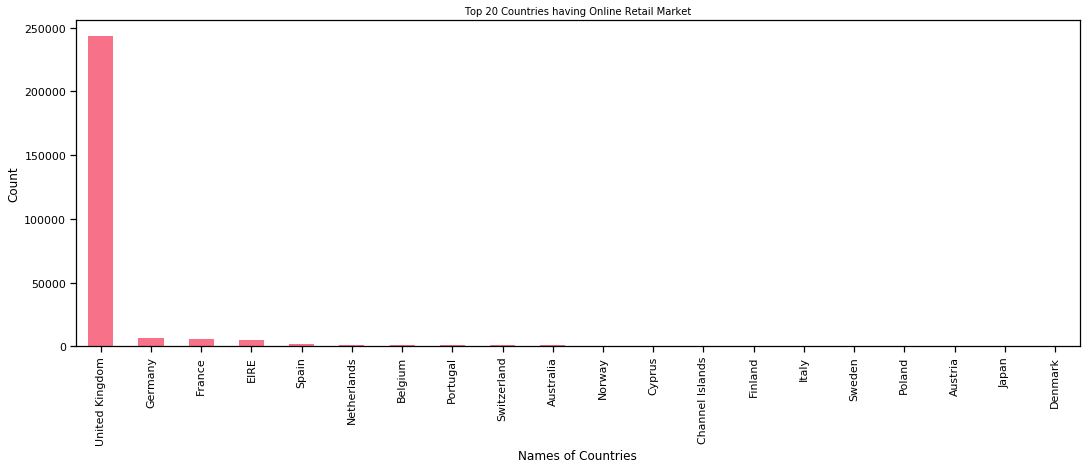

In [51]:
df['Country'].value_counts().head(20).plot.bar(figsize = (18, 6))
plt.title('Top 20 Countries having Online Retail Market', fontsize = 10)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

The main customers are from the UK, and there are relatively few overseas customers, so online retailers can consider how to attract overseas customers and increase their sales.

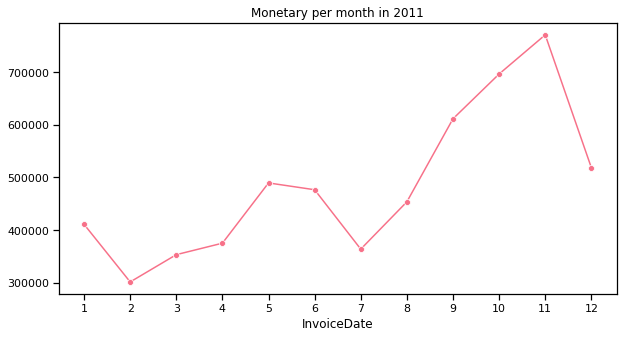

In [44]:
# Visualizing the Monetary per month in 2011.
df['Monetary'] = df['Quantity'] * df['UnitPrice']
df_month = df[df.InvoiceDate.dt.year==2011]
monthly_gross = df_month.groupby(df_month.InvoiceDate.dt.month).Monetary.sum()
plt.figure(figsize=(10,5))
sns.set_context("notebook")
sns.set_palette("husl")
sns.lineplot(y=monthly_gross.values,x=monthly_gross.index, marker='o')
plt.xticks(range(1,13))
plt.title("Monetary per month in 2011")
plt.show()

From this graph, we can clearly see that November is the peak of shopping, the least people shop in February.
Therefore, online retailers can stock up before November to ensure that there are enough goods, and in February, they can provide some discounts to attract customers.

### RFM Analysis 

RFM (recency, frequency, monetary) analysis is a marketing technique used to determine quantitatively which customers are the best ones by examining how recently a customer has purchased (recency), how often they purchase (frequency), and how much the customer spends (monetary).

In [15]:
#M onetary:How much the customer spends
df['Monetary'] = df['Quantity']*df['UnitPrice']
rfm_m = df.groupby('CustomerID')['Monetary'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,2540.29
2,12348.0,1259.80
3,12350.0,334.40
4,12352.0,2079.46


In [16]:
# Frequency：How often they purchase
rfm_f = df.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,106
2,12348.0,22
3,12350.0,17
4,12352.0,63


In [17]:
# Merge Monetary and Frequency.
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Monetary,Frequency
0,12346.0,77183.60,1
1,12347.0,2540.29,106
2,12348.0,1259.80,22
3,12350.0,334.40,17
4,12352.0,2079.46,63


In [18]:
#Recency:How recently a customer has purchased.
#Convert to datetime to proper datatype
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [19]:
# Know the last transaction date
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [20]:
# The difference between max date and transaction date
df['Difference'] = max_date - df['InvoiceDate']
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Monetary,Difference
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [21]:
#Compute last transaction date to get the recency of customers
rfm_p = df.groupby('CustomerID')['Difference'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()
rfm_p['Difference'] = rfm_p['Difference'].dt.days
rfm_p.head()

,CustomerID,Difference
0,12346.0,325
1,12347.0,1
2,12348.0,248
3,12350.0,309
4,12352.0,35


In [22]:
#Merge Monetary, Frequency and Recency to get RFM.
rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Monetary', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,77183.60,1,325
1,12347.0,2540.29,106,1
2,12348.0,1259.80,22,248
3,12350.0,334.40,17,309
4,12352.0,2079.46,63,35


### Modeling

In clustering calculations, K-Means is a very popular algorithm, and this method is used in this analysis to mine value users.

The advantages of K-Mean:
1. Relatively simple to implement.
2. Scales to large data sets.
3. Guarantees convergence.
4. Can warm-start the positions of centroids.
5. Easily adapts to new examples.
6. Generalizes to clusters of different shapes and sizes, such as elliptical clusters.

The disadvantages of K-Mean:
1. Choosing k manually.
2. Being dependent on initial values.
3. Clustering outliers.
4. Scaling with number of dimensions.
5. Being dependent on initial values.

In [23]:
#Rescaling the attributes
rfm_df = rfm[['Monetary', 'Frequency', 'Recency']]
scaler = StandardScaler()
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(3746, 3)

In [24]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Monetary', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Monetary,Frequency,Recency
0,10.295081,-0.435280,2.059404
1,0.114769,0.197243,-0.982235
2,-0.059872,-0.308776,1.336545
3,-0.186084,-0.338896,1.909199
4,0.051918,-0.061790,-0.663051


In [45]:
#There are several methods for selecting the number of clusters, and the Elbow Criterion method is used here.
from sklearn.cluster import KMeans
ks = range(1,8)
inertias=[]
for k in ks:
    kc = KMeans(n_clusters=k, random_state=1)
    kc.fit(rfm_df_scaled)
    inertias.append(kc.inertia_)

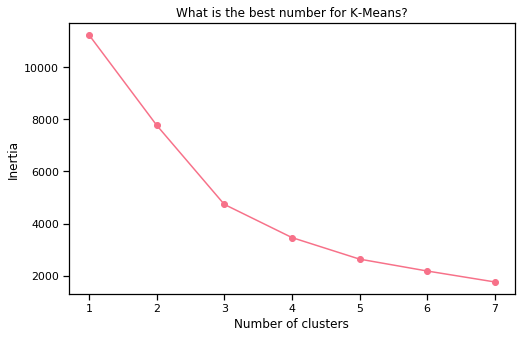

In [69]:
#plot ks vs inertias
f,ax = plt.subplots(figsize=(8,5))
plt.plot(ks,inertias,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('What is the best number for K-Means?')
plt.show()

When k = 4, the curve starts to change smoothly, so choose 4 as the number of clusters

In [27]:
kc=KMeans(n_clusters=4,random_state=1)
kc.fit(rfm_df_scaled)
cluster_labels = kc.labels_
#Calculate average RFM values and size for each cluster
rfm_k4=rfm_df.assign(k_cluster=cluster_labels)
#Calculate average RFM values and sizes for each cluster
rfm_k4.groupby('k_cluster').agg({'Recency':'mean','Frequency':'mean','Monetary':['mean','count']}).round(0)

Recency Frequency  Monetary      
             mean      mean      mean count
k_cluster                                  
0            44.0      85.0    1700.0  2605
1           249.0      26.0     518.0  1126
2             1.0    3102.0   40185.0     6
3            47.0     528.0  123518.0     9

The mean of frequency of Customers with cluster 2 are 3,102, and the mean amount they spent are 40,185 dollars, and the recent day they made an order was one day before.

Customers have been grouped, let's look at the consumption behavior characteristics of different types of customers.

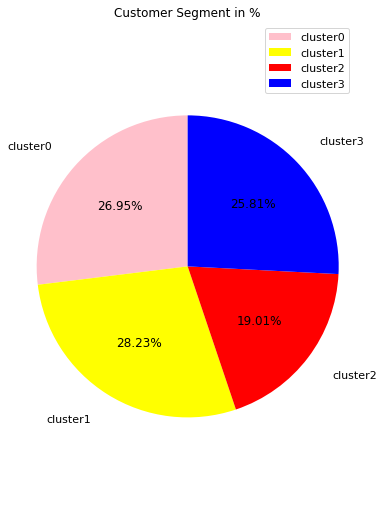

In [68]:
#different customer category and the number of customer using K-means
customer_num=rfm_k4.groupby('k_cluster').agg({'Recency':['count']})
#pie figure
fig=plt.figure(figsize=(6,9))
test=[1593,1669,1124,1526]
labels = [u'cluster0',u'cluster1',u'cluster2',u'cluster3']
colors=['pink','yellow','red','blue']
patches,text1,text2 = plt.pie(test,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%',
                      labeldistance = 1.2,
                      shadow=False,
                      startangle=90,
                      pctdistance = 0.6)
plt.axis('equal')
plt.legend()
plt.title('Customer Segment in %')
plt.show()
fig.savefig('segmentINpercent.png')

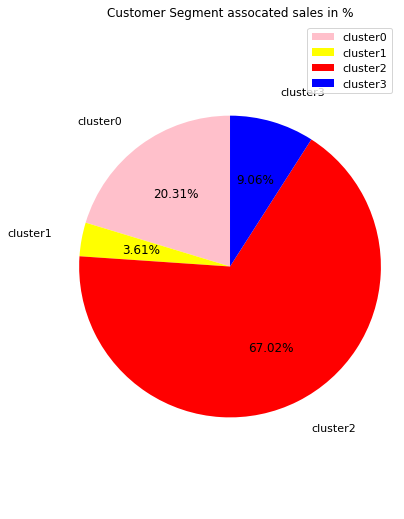

In [55]:
# different customer category and associated sales using K-means
customer_sales=rfm_k4.groupby('k_cluster').agg({'Monetary':['sum']})
# pie figure
fig=plt.figure(figsize=(6,9))
test=[1831297.823,325734.298,6044267.980,817254.723]
labels = [u'cluster0',u'cluster1',u'cluster2',u'cluster3']
colors=['pink','yellow','red','blue']
patches,text1,text2 = plt.pie(test,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%',
                      labeldistance = 1.2,
                      shadow=False,
                      startangle=90,
                      pctdistance = 0.6)
plt.axis('equal')
plt.legend()
plt.title('Customer Segment assocated sales in %')
plt.show()
fig.savefig('segmentSales.png')

Customers with Cluster 2 accounts for only 19.01% but contributes 67.02% of sales, which is the key development target of the business.

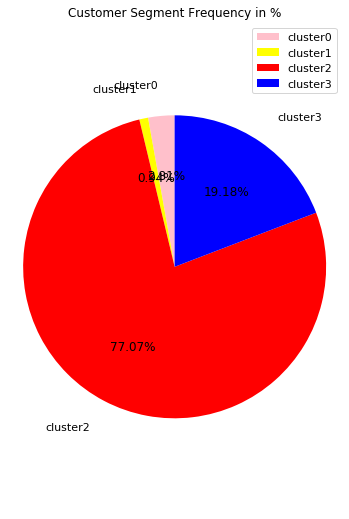

In [67]:
# different customer category and associated sales using K-means
customer_sales=rfm_k4.groupby('k_cluster').agg({'Frequency':['sum']})
# pie figure
fig=plt.figure(figsize=(6,9))
test=[240,80,6580,1638]
labels = [u'cluster0',u'cluster1',u'cluster2',u'cluster3']
colors=['pink','yellow','red','blue']
patches,text1,text2 = plt.pie(test,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%',
                      labeldistance = 1.2,
                      shadow=False,
                      startangle=90,
                      pctdistance = 0.6)
plt.axis('equal')
plt.legend()
plt.title('Customer Segment Frequency in %')
plt.show()
fig.savefig('segmentFrequency.png')

Customers with Cluster 2 are frequent buyers, Custmers with Culster 1 are not frequent buyers.

###  Conclusion 

Through the descriptive statistical analysis, we learned about the overall operation of the e-commerce company and calculated the monthly sales volume and total monthly sales. The monthly sales increased significantly in September, October, and November 2011, and the least people shop in February. Therefore, online retailers can stock up before November to ensure that there are enough goods, and in February, they can provide some discounts to attract customers. We found that most of the orders are from the UK.

In order to mine valuable users, we use two methods. The first method is to use the RFM model to group users, and the second method is to use the K-Means algorithm to group users by "machine learning". Both methods are mining. To generate value users, compare the user portrait results obtained by the two methods, the result obtained by the K-Means method is better, and the final value users excavated accounted for 19.01% but contributed 67.02% of sales. 
Customers with Cluster 2 are the frequent buyers and most valuable customers, so they will respond to online retailers' current campaign. Therefore, Customers with Cluster 2 are the key development target of the business.

Find value customers with k_cluster=2, and conduct targeted analysis on the shopping behaviors of value customers, such as consumption habits (shopping time), types of goods that they like to buy, correlation of shopping types (products that like to buy together), etc. It can provide value users with personalized consumption plans, and provide value customers with a consumer-centric smart business model.

### Limitation 

There is no assurance that it will lead to the best solution.

The unsupervised learning method in machine learning is used here, and there are no specific indicators for evaluating the model. To verify the effectiveness and accuracy of the above-mentioned RFM model and K-Means algorithm for value user mining, the classification effect needs to be verified in practical applications.

### Future Work 

After determining the value user, I can further learn the consumption habits of the value user, so as to provide a consumer-centric smart business model, and perform multiple iterations according to the actual application to optimize the value user mining model. I will test and compare the solutions with other clustering methods, and determine the areas of improvement.